## 鸢尾花

In [2]:
from sklearn import datasets #自带数据集
from sklearn.model_selection import train_test_split #数据集划分
from sklearn.preprocessing import StandardScaler #标准化
import numpy as np
from sklearn.linear_model import LogisticRegression
#np.set_printoptions(suppress=True)  不用科学计数法表示
import matplotlib.pyplot as plt

In [3]:
data = datasets.load_breast_cancer()
Data = data.data

In [4]:
iris = datasets.load_iris() 
X,target = iris.data,iris.target #样本数据和样本类别

In [12]:
X = StandardScaler().fit_transform(X) #标准化

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.2)

## 留出法

In [8]:
def model_learn(X,target,arg_model):
    #模型的训练，数据集划分，标准化
    X = StandardScaler().fit_transform(X) #标准化
    random_samples = []  #存储每次随机划分各类别样本数 
    train_precision = [] #训练样本精度
    test_precision = []  #测试样本精度
    for i in range(100):
        #一百次随机划分
        #对数据集进行划分
        X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.2,
                                                        random_state=i,shuffle=True,stratify=target)
        #random_state是随机数种子，shuffle是要不要打乱，默认是True,stratify=target是对类别进行分层抽样
        random_samples.append([len(y_test[y_test==0]),len(y_test[y_test==1]),len(y_test[y_test==2])])
        
        #多分类训练与测试
        model = arg_model() #创建模型实例
        model.fit(X_train,y_train)#训练样本
        y_train_pred = model.predict(X_train)#训练样本预测，经验误差
        y_test_pred = model.predict(X_test)#测试样本训练，泛化误差
        
        train_correct = 0
        for j,y in enumerate(y_train_pred):
            if y == y_train[j]:
                train_correct += 1
        train_precision.append(train_correct/len(y_train))
        
        test_correct = 0
        for j,y in enumerate(y_test_pred):
            if y == y_test[j]:
                test_correct += 1
        test_precision.append(test_correct/len(y_test))
#     print('100次随机划分+分层采样，训练精度是:%.5f'%(np.mean(train_precision)))
#     print('100次随机划分+分层采样，测试精度是:%.5f'%(np.mean(test_precision)))
    print('100次随机划分+分层采样，训练精度是:{:.5}'.format(np.mean(train_precision)))
    print('100次随机划分+分层采样，测试精度是:{:.5}'.format(np.mean(test_precision)))
    return train_precision,test_precision
def plt_precision(train_precision,test_precision):
    fig , ax = plt.subplots(1,2,figsize=(12,4))
    ax[0].plot(train_precision,'.-')
    ax[0].set_title('mean of train_precision = {:.5f}'.format(np.mean(train_precision)))
    ax[0].set_xlabel('random split number')
    ax[0].set_ylabel('train_precision')
    ax[0].grid()
    
    ax[1].plot(test_precision,'r.-')
    ax[1].set_title('mean of test_precision = {:.5f}'.format(np.mean(test_precision)))
    ax[1].set_xlabel('random split number')
    ax[1].set_ylabel('test_precision')
    ax[1].grid()

100次随机划分+分层采样，训练精度是:0.96892
100次随机划分+分层采样，测试精度是:0.95567


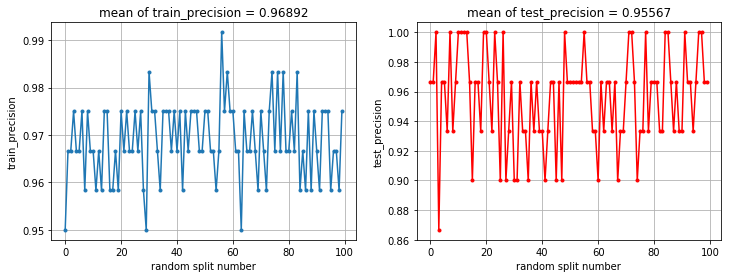

In [9]:
train_precision,test_precision = model_learn(X,target,LogisticRegression)
plt_precision(train_precision,test_precision)

100次随机划分+分层采样，训练精度是:1.0
100次随机划分+分层采样，测试精度是:0.95


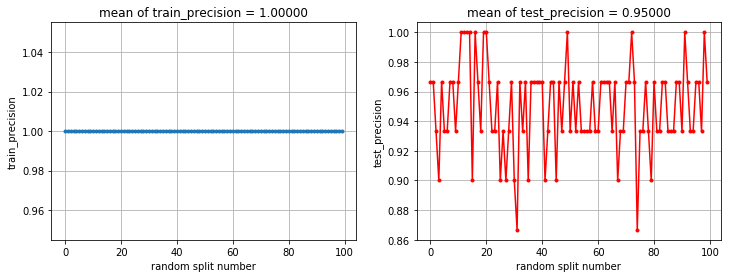

In [7]:
from sklearn.tree import DecisionTreeClassifier
train_precision,test_precision = model_learn(X,target,DecisionTreeClassifier)
plt_precision(train_precision,test_precision)

100次随机划分+分层采样，训练精度是:0.96167
100次随机划分+分层采样，测试精度是:0.953


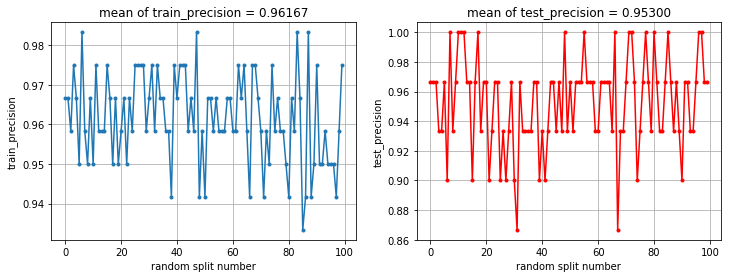

In [8]:
from sklearn.neighbors import KNeighborsClassifier
train_precision,test_precision = model_learn(X,target,KNeighborsClassifier)
plt_precision(train_precision,test_precision)

100次随机划分+分层采样，训练精度是:0.97517
100次随机划分+分层采样，测试精度是:0.963


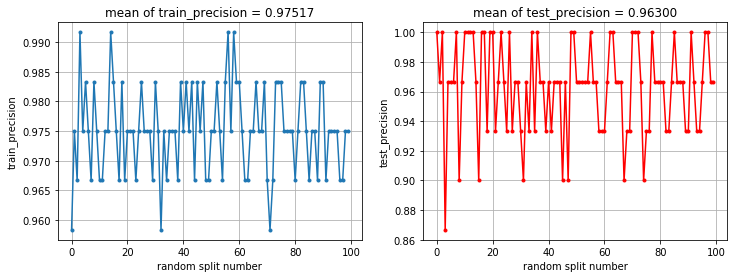

In [9]:
from sklearn.svm import SVC
train_precision,test_precision = model_learn(X,target,SVC)
plt_precision(train_precision,test_precision)

## k折交叉验证

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def knn_model_train(X,y):
    #采用十次交叉验证法对Knn算法进行超参数选择
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=111,stratify = y)
    k_range = range(1,31) #超参数选择区间
    cv_scores = [] #存储每次调参的10折交叉验证精度均值 
    for k in k_range:
        knn = KNeighborsClassifier(k) #k值
        scores = cross_val_score(knn,X_train,y_train,scoring="accuracy",cv=10) #按精度进行评估正确数/总数
        cv_scores.append(scores.mean())
    return cv_scores

In [11]:
def plt_knn_scores(cv_scores):
    #绘制knn参数选择的图像
    plt.figure(figsize=(8,6))
    plt.plot(cv_scores,'-o')
    plt.xlabel("knn_k value",fontsize=12)
    plt.ylabel("mean accuracy",fontsize=12)
    plt.grid()
    plt.title("KNN super-args of mean accuracy",fontsize=14)
    plt.show()

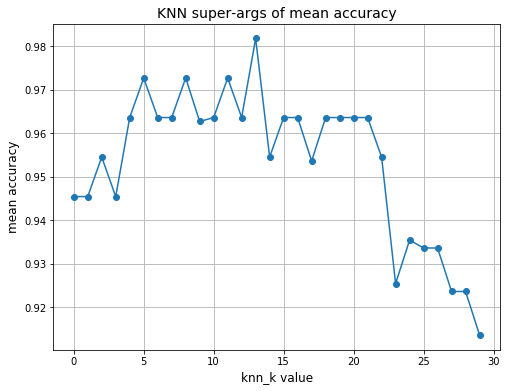

In [12]:
cv_scores = knn_model_train(X,target)
plt_knn_scores(cv_scores)

In [13]:
#最佳K值是13
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size = 0.3,random_state=111,stratify = target)
k = 13
knn_best = KNeighborsClassifier(k)
knn_best.fit(X_train,y_train)
print("泛化精度是{:.5f}".format(knn_best.score(X_test,y_test)))

泛化精度是0.97778


## 自助法

numpy中reshape函数的三种常见相关用法

reshape(1,-1)转化成1行：

reshape(2,-1)转换成两行：

reshape(-1,1)转换成1列：

reshape(-1,2)转化成两列

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
iris.target.reshape(-1,1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [15]:
iris.target[:,np.newaxis]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [14]:
import pandas as pd 

iris_data = pd.DataFrame(np.hstack((iris.data,iris.target[:,np.newaxis])),
                        columns = ["sepal length","sepal width","petal length","petal width","class"])
iris_data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [15]:
ratio_list = []  #存储每次采样不被选中的样本比例
n = iris_data.shape[0] #样本量
for i in range(10000):
    #自助法，大数定律思想
    bootstrapping = [] #存储m次采样获得的样本序号
    for j in range(n):
        bootstrapping.append(int(np.random.random()*n))  #存索引号
    train = iris_data.iloc[bootstrapping,:]
    test = iris_data.iloc[np.setdiff1d(iris_data.index,train.index)]
    ratio = test.shape[0] / n
    ratio_list.append(ratio)
    
print("未出现在训练集中的数据比例：%0.5f" % np.mean(ratio_list))

未出现在训练集中的数据比例：0.36638


In [18]:
ratio_list

[0.36666666666666664,
 0.35333333333333333,
 0.41333333333333333,
 0.36666666666666664,
 0.4066666666666667,
 0.38666666666666666,
 0.3466666666666667,
 0.35333333333333333,
 0.36666666666666664,
 0.37333333333333335,
 0.38,
 0.37333333333333335,
 0.43333333333333335,
 0.36,
 0.35333333333333333,
 0.32666666666666666,
 0.38666666666666666,
 0.37333333333333335,
 0.4,
 0.3466666666666667,
 0.36666666666666664,
 0.3466666666666667,
 0.3466666666666667,
 0.31333333333333335,
 0.3333333333333333,
 0.34,
 0.3466666666666667,
 0.37333333333333335,
 0.38666666666666666,
 0.38,
 0.3466666666666667,
 0.3,
 0.36666666666666664,
 0.36666666666666664,
 0.32666666666666666,
 0.36666666666666664,
 0.3933333333333333,
 0.38,
 0.36666666666666664,
 0.36666666666666664,
 0.34,
 0.3466666666666667,
 0.3933333333333333,
 0.3333333333333333,
 0.36666666666666664,
 0.4,
 0.36,
 0.36666666666666664,
 0.37333333333333335,
 0.3,
 0.38,
 0.41333333333333333,
 0.32,
 0.38666666666666666,
 0.41333333333333333,
 

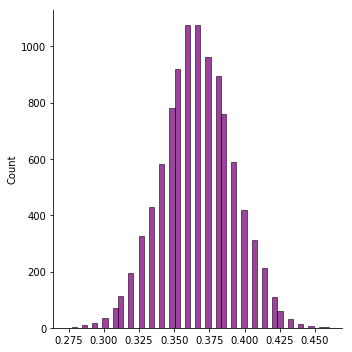

In [16]:
import seaborn as sns
sns.displot(ratio_list,kind = 'hist',color = 'purple')

In [17]:
X_train,y_train = train.iloc[:,0:4].values,train.iloc[:,4].values
X_test,y_test = test.iloc[:,0:4].values,test.iloc[:,4].values

In [18]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("自助法采样，泛化精度是{:.5f}".format(acc))

自助法采样，泛化精度是0.96078


## 调参与最终模型

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn import datasets

In [20]:
iris = datasets.load_iris()
X,y = iris.data,iris.target

#划分数据集
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 0,shuffle=True, stratify=y)

knn_model = KNeighborsClassifier() #创建K近邻算法实例

#超参数设置调优
n_neighbors = [3,5,7,9,11,13,15,17] #近邻样本数

algorithm = ["ball_tree","kd_tree","brute"] #采样的算法

p=[1,2] #距离度量， 1：曼哈顿距离 2：欧氏距离

param_grid = dict(n_neighbors = n_neighbors,algorithm = algorithm ,p = p) #参数网格

kflod = StratifiedKFold(n_splits=10,shuffle=True,random_state=0) #分层采样交叉验证

grid_search = GridSearchCV(knn_model, param_grid, scoring = "accuracy", cv = kflod) #网格搜索

grid_result = grid_search.fit(X_train,y_train)  #运行网格搜索，拟合数据

print("=" * 80)

print("Best: %f using %s"%(grid_result.best_score_,grid_result.best_params_))

print("-" * 80)

means = grid_result.cv_results_["mean_test_score"]

params = grid_result.cv_results_['params']

for means,params in zip(means,params):
    print("%f with: %r"% (means,params))


Best: 0.942727 using {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1}
--------------------------------------------------------------------------------
0.942727 with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1}
0.942727 with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2}
0.922727 with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1}
0.931818 with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2}
0.903636 with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1}
0.941818 with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2}
0.913636 with: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1}
0.922727 with: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 2}
0.922727 with: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1}
0.922727 with: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2}
0.922727 with: {'algorithm': 'ball_tree', 'n_neighbors': 13, 'p': 1}
0.922727 with: {'algorithm': 'ball_tree', 'n_neighbors': 13, 'p': 2}
0.931818 with: {'algorith

In [21]:
len(grid_result.cv_results_["mean_test_score"])
#为什么是48？
#根据所有参数的组合相乘得到，8*3*2

48

In [22]:
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = grid_result.best_params_["n_neighbors"],
                            algorithm = grid_result.best_params_['algorithm'],
                            p = grid_result.best_params_['p'])

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print('KNN算法调参后精度：',acc)

KNN算法调参后精度： 0.9777777777777777


In [23]:
model.predict(X_train)

array([2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2])

In [24]:
model.predict(X_test)

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2])

### 贝叶斯优化调参

### https://districtdatalabs.silvrback.com/parameter-tuning-with-hyperopt

In [4]:
from hyperopt import fmin, tpe, hp

best = fmin(
    fn = lambda x:(x-1)**2,
    space = hp.uniform('x', -2, 2),
    algo = tpe.suggest,
    max_evals = 100)
print(best)

100%|████████████████████████████████████████| 1000/1000 [00:05<00:00, 192.52trial/s, best loss: 2.898119797785941e-08]
{'x': 1.0001702386500706}


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


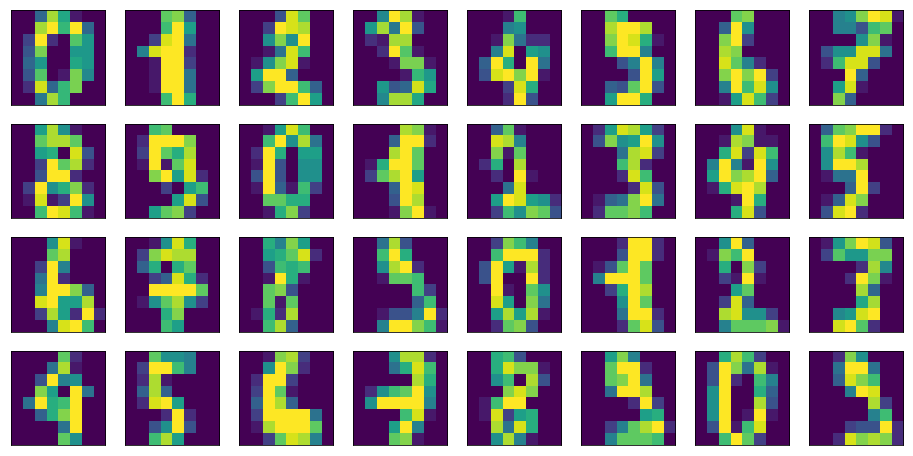

In [9]:
from hyperopt import fmin, tpe, hp
from sklearn import datasets

digits = datasets.load_digits() #加载手写数字数据集
print(digits.images[0])
fig = plt.figure(figsize = (16,8))
#显示前24个图片
for i in range(32):
    ax = fig.add_subplot(4, 8, i + 1,xticks = [],yticks = [])
    ax.imshow(digits.images[i])
plt.show()

In [24]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target,test_size = 0.3, random_state = 0)
print("训练集的样本量和特征数：",X_train.shape)
print("测试集的样本量和特征数：",X_test.shape)
#特征数为64是因为每个图像是8*8

#超参数搜索空间
para_search_space = {
    "C" : hp.uniform("C",1,100),
    "kernel" : hp.choice("kernel",["rbf","poly"]),
    "gamma" : hp.loguniform("gamma", np.log(0.001),np.log(1))
}
      
scores_test = [] #存储每次调参的泛化精度值
count = 0

def object_fun(params):
    #目标函数
    clf = SVC(**params) #接收字典形式参数，采用**参数
    clf.fit(X_train, y_train) #模型训练
    y_pred = clf.predict(X_test) #测试数据预测
    scores =accuracy_score(y_test, y_pred) #每次精度，可用来绘制图像
    scores_test.append(scores)
    global count
    count += 1
    print(params)
    print("[{0}], Test acc: {1}".format(str(count), scores))
    print('='*80)
    return 1 - scores 

trials = Trials()
best = fmin(object_fun, para_search_space, algo = tpe.suggest, max_evals = 100, trials = trials)
print("最佳模型超参数：", best)

kernel_lst = ['rbf', 'poly']
model = SVC(C = best["C"], kernel = kernel_lst[best["kernel"]], gamma = best["gamma"])
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print("最终模型的泛化精度是：",accuracy_score(y_test, y_test_pred))

#超参选择组合中繁华精度绘图
plt.figure(figsize = (8, 6))
plt.plot(scores_test,"b.-")
plt.xlabel("number", fontsize = 12)
plt.ylabel("test scores",fontsize = 12)
plt.grid()
plt.title("Super parameter tunning of SVM", fontsize = 14)
plt.show()

训练集的样本量和特征数： (1257, 64)
测试集的样本量和特征数： (540, 64)
{'C': 57.282524712346024, 'gamma': 0.006749941958719614, 'kernel': 'poly'}                                             
[1], Test acc: 0.9796296296296296                                                                                      
{'C': 25.26182848717809, 'gamma': 0.004285131615661747, 'kernel': 'rbf'}                                               
[2], Test acc: 0.9777777777777777                                                                                      
{'C': 51.687394394912644, 'gamma': 0.005921334874616314, 'kernel': 'rbf'}                                              
[3], Test acc: 0.9648148148148148                                                                                      
{'C': 47.33522995836937, 'gamma': 0.12504289422781986, 'kernel': 'rbf'}                                                
[4], Test acc: 0.09259259259259259                                                                               

KeyboardInterrupt: 

array([[ 0.,  0., 11., ..., 13., 16.,  8.],
       [ 0.,  1., 15., ...,  1.,  0.,  0.],
       [ 0.,  2., 13., ..., 16., 16.,  3.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  1.,  0.],
       [ 0.,  0.,  8., ...,  2.,  0.,  0.],
       [ 0.,  0.,  1., ..., 11.,  1.,  0.]])